# object recognition for autonomous vehicles
The goal of this project is to classify 15 different types of objects from the road. The types are following: <br/>
1. Cars
2. Trucks
3. Traffic signals: such as stop signs, traffic lights, and road signs
4. Road markings: such as lane lines, crosswalks, and pavement markings
5. Construction zones: such as cones, barriers, and construction vehicles
6. Animals: such as wild animals, domestic animals, and farm animals
7. Road obstacles: such as fallen trees, debris, and potholes
8. Pedestrians: people walking, jogging or cycling
9. Emergency vehicles: such as ambulances, fire trucks, and police cars
10. Bicycles: individual or group of people riding bicycles
11. Motorcycles: individual or group of people riding motorcycles
12. Buses
13. Road works: construction workers, heavy machinery, excavation
14. Drones: flying drones in the vicinity of the vehicle
15. Zebra crossing

# Setting Up Necessary Things

In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 8 # batch size

In [4]:
!pip install -Uqq fastai fastbook nbdev

In [5]:
from fastai import *
from fastbook import *
from fastai.vision.all import *

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
%cd /content/drive/MyDrive/MasterCourse/CapstonProject02

/content/drive/MyDrive/MasterCourse/CapstonProject02


In [30]:
!zip -r '/content/drive/MyDrive/MasterCourse/CapstonProject02/obj_data.zip' '/content/drive/MyDrive/MasterCourse/CapstonProject02/data'

  adding: content/drive/MyDrive/MasterCourse/CapstonProject02/data/ (stored 0%)
  adding: content/drive/MyDrive/MasterCourse/CapstonProject02/data/Cars/ (stored 0%)
  adding: content/drive/MyDrive/MasterCourse/CapstonProject02/data/Cars/1cc22000-af8f-4a34-bfba-f1f7a0ca95a7.jpg (deflated 0%)
  adding: content/drive/MyDrive/MasterCourse/CapstonProject02/data/Cars/8560e12c-1392-490a-ae8d-21b218545efe.jpg (deflated 0%)
  adding: content/drive/MyDrive/MasterCourse/CapstonProject02/data/Cars/8c32e181-2722-47f9-a216-27462dbc0dd0.jpg (deflated 0%)
  adding: content/drive/MyDrive/MasterCourse/CapstonProject02/data/Cars/1db14055-c092-439c-bae6-bfeddbfb0cf5.jpg (deflated 0%)
  adding: content/drive/MyDrive/MasterCourse/CapstonProject02/data/Cars/60e230c0-a739-4d6d-920d-ac94be75d701.jpg (deflated 0%)
  adding: content/drive/MyDrive/MasterCourse/CapstonProject02/data/Cars/ed3da424-d879-43aa-a74f-a6c873c08b93.jpg (deflated 1%)
  adding: content/drive/MyDrive/MasterCourse/CapstonProject02/data/Cars/3

# Download Images from Browser

You can download images from Google Image Search and Bing Image Search. You can try it out in your own time. You might need to build a scraper or use their API. <br/>

For ease, we are going to use **DuckDuckGo Image Search**. <br/>

**Good news!** Fastai has a function to do this for us.

In [8]:
doc(search_images_ddg)

In [9]:
labels = [
    "Cars",
    "Trucks",
    "Traffic signals",
    "Road markings",
    "Construction zones",
    "Animals",
    "Road obstacles",
    "Pedestrians",
    "Emergency vehicles",
    "Bicycles",
    "Motorcycles",
    "Buses",
    "Road works",
    "Drones",
    "Zebra crossing",
]
len(labels)

15

In [10]:
images = search_images_ddg(labels[0])
f"No of Images => {len(images)} -- One Image URL => {images[0]}"

'No of Images => 200 -- One Image URL => https://assets.volvocars.com/hk/~/media/shared-assets/images/galleries/concept-cars/coupe/gallery-exterior/gallery_isaksson_entrance_second_006_8bit.jpg'

In [11]:
doc(download_url)

In [12]:
dest = "baseball cap.jpg"
download_url(images[0], dest, show_progress=False)

Path('baseball cap.jpg')

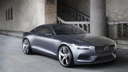

In [13]:
image = Image.open(dest)
image.to_thumb(128, 128)

## Combine all of them

In [14]:
data_path = "data"
if not os.path.exists(data_path): 
  os.mkdir(data_path)

for obj_type in labels:

  dest = f"{data_path}/{obj_type}"
  if not os.path.exists(dest): 
    os.mkdir(dest)

  try:
    obj_image_urls = search_images_ddg(obj_type)
    download_images(dest, urls = obj_image_urls)
    
  except:
    continue

In [15]:
image_counts = get_image_files(data_path)
image_counts

(#2850) [Path('data/Cars/ee12538a-ce70-4415-a6f2-d8bcf1e3f473.jpg'),Path('data/Cars/75025a25-ff8f-4f2d-9f80-b695339f620a.jpg'),Path('data/Cars/2d0a3be3-2b8a-4089-b1cf-faaa34962630.jpg'),Path('data/Cars/1cc22000-af8f-4a34-bfba-f1f7a0ca95a7.jpg'),Path('data/Cars/8560e12c-1392-490a-ae8d-21b218545efe.jpg'),Path('data/Cars/8c32e181-2722-47f9-a216-27462dbc0dd0.jpg'),Path('data/Cars/1db14055-c092-439c-bae6-bfeddbfb0cf5.jpg'),Path('data/Cars/0970e9aa-438b-42fa-92de-84c01e22d645.jpg'),Path('data/Cars/60e230c0-a739-4d6d-920d-ac94be75d701.jpg'),Path('data/Cars/ed3da424-d879-43aa-a74f-a6c873c08b93.jpg')...]

In [16]:
failed = verify_images(image_counts)
failed

/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


(#123) [Path('data/Cars/ee12538a-ce70-4415-a6f2-d8bcf1e3f473.jpg'),Path('data/Cars/75025a25-ff8f-4f2d-9f80-b695339f620a.jpg'),Path('data/Cars/2d0a3be3-2b8a-4089-b1cf-faaa34962630.jpg'),Path('data/Cars/0970e9aa-438b-42fa-92de-84c01e22d645.jpg'),Path('data/Cars/780b9705-02e6-422c-815e-9beebdb1b19b.jpg'),Path('data/Cars/83a3c82d-7070-4a21-9c89-421e622d0860.jpg'),Path('data/Cars/b62f4bb5-a656-4bfc-98ef-462a68273321.jpg'),Path('data/Cars/88debaea-901b-4f23-8ec9-89688ded8016.jpg'),Path('data/Cars/e45e8d7e-3e8b-45b1-91d6-bde7563c3a20.jpg'),Path('data/Cars/2255a26b-2adf-46e6-ae0e-9074827ca626.jpg')...]

In [17]:
failed.map(Path.unlink)

(#123) [None,None,None,None,None,None,None,None,None,None...]

# From Data to Data Loaders

In [18]:
doc(get_image_files)

In [19]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files,                        # get_image_files returns a list of all images in that path recursively by default
    splitter=RandomSplitter(valid_pct=0.1, seed=42),  # getting 90-10 train-validation split
    get_y=parent_label,                               # taking the folder name as labels
    item_tfms=Resize(128))                            # resizing to get the image of same shape

In [20]:
dls = dblock.dataloaders(data_path,bs=bs)             # setting up batch size for efficient GPU use

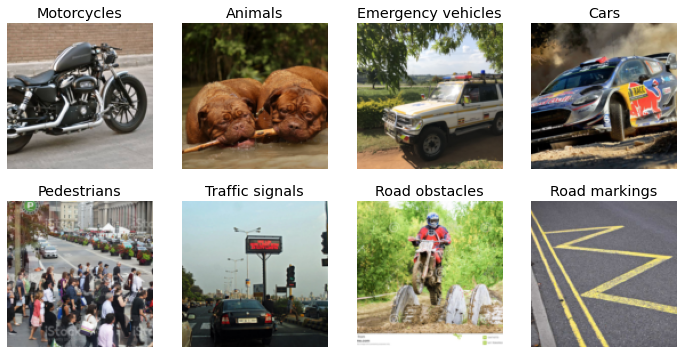

In [21]:
dls.train.show_batch(max_n=8, nrows=2)

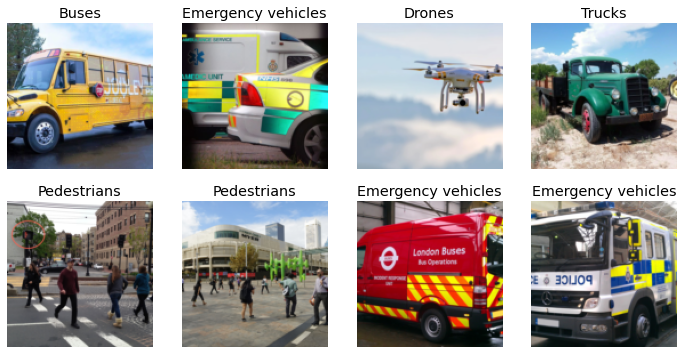

In [22]:
dls.valid.show_batch(max_n=8, nrows=2)

# Data Augmentation

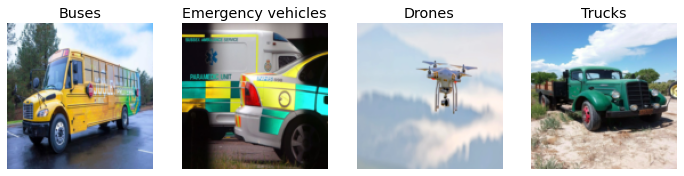

In [23]:
dblock = dblock.new(item_tfms=Resize(128, ResizeMethod.Squish)) # Squishing the whole image into (128 x 128) size
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

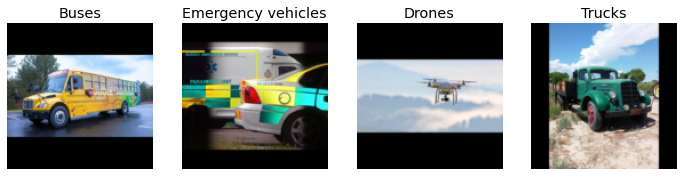

In [24]:
dblock = dblock.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros')) # Padding the extra spaced the whole image into (128 x 128) size without squishing
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

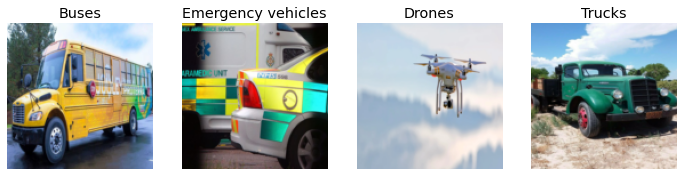

In [25]:
dblock = dblock.new(item_tfms=RandomResizedCrop(128, min_scale=0.3)) # Randomly cropping, cutting, resizing, coloring parts of image into (128 x 128) size
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

In [26]:
doc(aug_transforms)

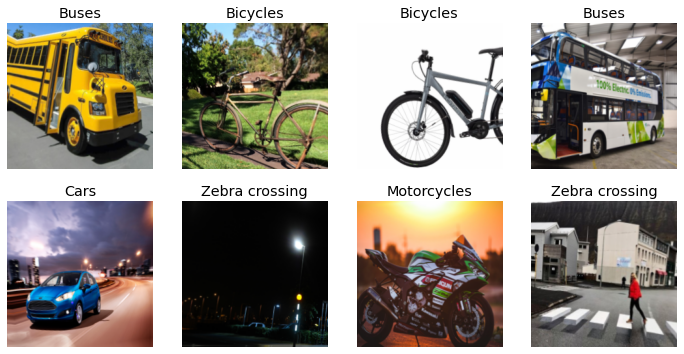

In [27]:
# RandomResizedCrop crops images randomly and create copies so that we don't miss out anything
# aug_transforms is used for image data augmentation
dblock = dblock.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = dblock.dataloaders(data_path)
dls.train.show_batch(max_n=8, nrows=2)

In [29]:
torch.save(dls, "obj_dataloader_v0.pkl")